# distributionViz
A notebook to visualize differences in distributions of obs from Landsat and Sentinel 2

## Primary POCs

Ian Housman- ian.housman@usda.gov

Robert Chastain- robert.chastain@usda.gov


In [3]:
import pandas as pd
import matplotlib,os,sys,glob
import numpy as np
import matplotlib.pyplot as plt
print('done')

done


In [4]:
#Set up two sets of csv tables
#These are assumed to be from geeViz's pheenoViz tool

#Specify a dictionary of folders containing tables for each histogram
#No limit on how many different types can be specified
folders_dict= {'Clean':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_clean_lake_combo_160_280_32\tables',
            ],
               'Algal Bloom':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_dirty_big_sandy_160_280_32\tables',
                       r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_dirty_keyhole_160_280_32\tables'],
               'Turbid':[r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_murky_lake_combo_160_280_32\tables',
                       r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\partial_year_data_runs\Wyoming\wy_murky_lake_combo2_160_280\tables']
              }
               
#Specify which bands to use  
#These bands need to be available in the specified tables folders above
whichBands = ['bloom2','NDGI']              

#Provide a color for each type specified aboe
colors_dict = {'Clean':'#0000FF','Algal Bloom':'#00FF00','Turbid':'#FFFF00'}

#Provide an output folder for histograms
output_dir = r'Q:\Algal_detection_GEE_work\Viz_Outputs_RAC\distributionViz'

#Provide a name for the run for the histograms
run_name = 'WY 160-280'

#Specify number of bins in histogram
nBins = 100

#######################################################
if not os.path.exists(output_dir):os.makedirs(output_dir)
print('done')

done


In [5]:
#Read in tables
tables = {}
#Iterate across each band
for band in whichBands:
    band_tables = {}
    #Iterate across each type
    for key in folders_dict.keys():
        print('Reading in tables for: {} {}'.format(band,key))
        folders = folders_dict[key]
        li = []
        #Get the csvs and read in valid values into a single long list
        for folder in folders:
            csvs = glob.glob(os.path.join(folder,'*{}.csv'.format(band)))
            for csv in csvs:
                df = pd.read_csv(csv, index_col=None, header=0).to_numpy().flatten()
                df = df[~np.isnan(df)]
                
                li.append(df)
        
        li = np.concatenate(li)
        #Apply a 1-99 pctl clip to get rid of outliers
        min,max = np.percentile(li,[1,99])
        li = np.clip(li,min,max)
        
        band_tables[key] = li
  
    tables[band] = band_tables
print(tables)

Reading in tables for: bloom2 Clean
Reading in tables for: bloom2 Algal Bloom
Reading in tables for: bloom2 Turbid
Reading in tables for: NDGI Clean
Reading in tables for: NDGI Algal Bloom
Reading in tables for: NDGI Turbid
{'bloom2': {'Clean': array([0.65744603, 0.60018539, 0.6069802 , ..., 0.62697548, 0.5460639 ,
       0.78414714]), 'Algal Bloom': array([1.07055557, 1.04293585, 1.03838539, ..., 0.94000423, 0.959167  ,
       0.96714604]), 'Turbid': array([0.7964918 , 0.73604673, 0.75321543, ..., 0.77318597, 0.73933816,
       0.77272773])}, 'NDGI': {'Clean': array([-0.20667581, -0.24985552, -0.24458745, ..., -0.22932741,
       -0.29360756, -0.12098377]), 'Algal Bloom': array([ 0.03407401,  0.02101674,  0.01869369, ..., -0.03092558,
       -0.02084203, -0.01672622]), 'Turbid': array([-0.11328088, -0.15211116, -0.1410265 , ..., -0.1279133 ,
       -0.14986265, -0.12820484])}}


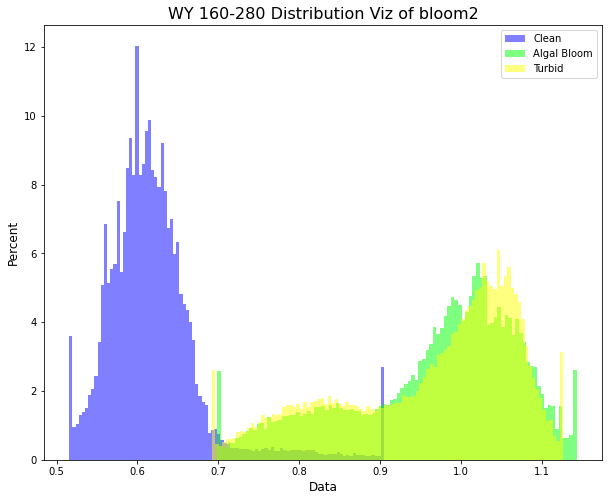

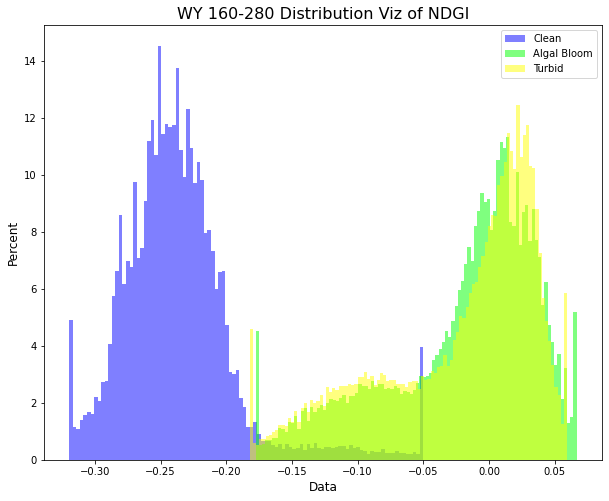

In [6]:
#Make histograms
for band in whichBands:
    plt.figure(figsize=(10,8))

    tables_band = tables[band]
    for key in tables_band.keys():
        
        plt.hist(tables_band[key], bins=nBins, alpha=0.5, density=True,label=key,color = colors_dict[key])
    plt.xlabel("Data", size=12)
    plt.ylabel("Percent", size=12)
    plt.title("{} Distribution Viz of {}".format(run_name,band), size=16)
    plt.legend(loc='upper right')
    plt.savefig(os.path.join(output_dir,'{}_{}.png'.format(run_name,band)))